In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/데이터톤/데이터/2324전처리.csv')
data

,id,방문횟수,여행형태,방한목적,고려한_관광활동_1,고려한_관광활동_2,고려한_관광활동_3,고려한_인프라_1,고려한_인프라_2,고려한_인프라_3,...,항목별만족도_trad_culture,항목별만족도_전시관람,항목별만족도_kpop_drama,항목별만족도_performance,항목별만족도_festival,항목별만족도_entertainment,항목별만족도_recreation,항목별만족도_immigration,항목별만족도_language,항목별만족도_safety
0,6,4,1,1,1.0,7.0,2.0,6.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,4,1,2,3.0,13.0,2.0,3.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,2,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,3,1,2,2.0,1.0,4.0,3.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,19273,2,1,1,3.0,2.0,1.0,5.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0
32408,19274,2,1,1,12.0,3.0,1.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0
32409,19275,1,1,1,13.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
32410,19277,2,1,1,3.0,2.0,1.0,1.0,5.0,7.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0


In [ ]:
for col in data.columns:
    print(col)

id
방문횟수
여행형태
방한목적
고려한_관광활동_1
고려한_관광활동_2
고려한_관광활동_3
고려한_인프라_1
고려한_인프라_2
고려한_인프라_3
참여_식도락관광
참여_쇼핑
참여_자연경관감상
참여_역사유적지방문
참여_전통문화체험
참여_박물관전시관관람
참여_한류스타관련
참여_공연관람
참여_지역축제
참여_유흥
참여_오락
참여_뷰티미용관광
참여_치료건강검진
참여_스포츠관람
참여_스포츠레포츠참가
참여_국제회의
참여_비즈니스
참여_연수교육연구
참여_기타
만족한활동_1
만족한활동_2
만족한활동_3
방문지역_서울
방문지역_경기
방문지역_인천
방문지역_강원
방문지역_대전
방문지역_충북
방문지역_충남
방문지역_세종
방문지역_경북
방문지역_경남
방문지역_대구
방문지역_울산
방문지역_부산
방문지역_광주
방문지역_전북
방문지역_전남
방문지역_제주
총체재기간(코드형)
총체재기간
1인지출경비
1인1일지출경비
1인지출경비_영향치결측
1인지출경비_상하위1%대체
1인1일지출경비_영향치_61일이상결측
1인1일지출경비_상하위1%대체
1인1일지출경비_상하위1%대체_61일이상결측
형태별_1일지출경비
형태별_1일지출경비_상하위1%대체_61일이상결측
형태별_1일지출경비_항공제외대체결측
항목별지출경비_쇼핑
항목별지출경비_치료
항목별지출경비_미용
항목별지출경비_음식점
항목별지출경비_식음료
항목별지출경비숙박비
항목별지출경비_문화서비스
전반적만족도
항목별만족도_식도락
항목별만족도_쇼핑
항목별만족도_자연경관감상
항목별만족도_뷰티미용관광
항목별만족도_치료건강검진
항목별만족도_스포츠관람
항목별만족도_스포츠레포츠참가
항목별만족도_여행경비
항목별만족도_숙박시설
재방문의사
타인추천의향
월별
분기별
국가별
성별
연령별
방한목적별
방한횟수별
여행형태별
weight
year
참여_휴양휴식웰니스
주요이용숙박시설_1
주요이용숙박시설_2
주요이용숙박시설_3
주요이용숙박시설_4
주요이용숙박시설_5
주요이용숙박시설_6
주요이용숙박시설_7
주요이용숙박시설_8
주요이용숙박시설_9
1인_지출경비_국제교통비제외
1인1일_지출경비_61일이상결

In [ ]:
print(data['참여_휴양휴식웰니스'].value_counts(dropna=False))
print(data['참여_자연경관감상'].value_counts(dropna=False))
print(data['참여_치료건강검진'].value_counts(dropna=False))
print(data['참여_뷰티미용관광'].value_counts(dropna=False))

참여_휴양휴식웰니스
NaN    29727
4.0     2685
Name: count, dtype: int64
참여_자연경관감상
3.0    18146
NaN    14266
Name: count, dtype: int64
참여_치료건강검진
NaN     30912
14.0      860
13.0      640
Name: count, dtype: int64
참여_뷰티미용관광
NaN     28822
13.0     1970
12.0     1620
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_휴양휴식웰니스_이진'] = data['참여_휴양휴식웰니스'].notna().astype(int)
data[['참여_휴양휴식웰니스', '참여_휴양휴식웰니스_이진']].head(10)
print(data['참여_휴양휴식웰니스_이진'].value_counts(dropna=False))

# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_자연경관감상_이진'] = data['참여_자연경관감상'].notna().astype(int)
data[['참여_자연경관감상', '참여_자연경관감상_이진']].head(10)
print(data['참여_자연경관감상_이진'].value_counts(dropna=False))

# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_치료건강검진_이진'] = data['참여_치료건강검진'].notna().astype(int)
data[['참여_치료건강검진', '참여_치료건강검진_이진']].head(10)
print(data['참여_치료건강검진_이진'].value_counts(dropna=False))

# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_뷰티미용관광_이진'] = data['참여_뷰티미용관광'].notna().astype(int)
data[['참여_뷰티미용관광', '참여_뷰티미용관광_이진']].head(10)
print(data['참여_뷰티미용관광_이진'].value_counts(dropna=False))

참여_휴양휴식웰니스_이진
0    29727
1     2685
Name: count, dtype: int64
참여_자연경관감상_이진
1    18146
0    14266
Name: count, dtype: int64
참여_치료건강검진_이진
0    30912
1     1500
Name: count, dtype: int64
참여_뷰티미용관광_이진
0    28822
1     3590
Name: count, dtype: int64


In [ ]:
print(data['참여_식도락관광'].value_counts(dropna=False))
print(data['참여_쇼핑'].value_counts(dropna=False))

참여_식도락관광
1.0    23477
NaN     8935
Name: count, dtype: int64
참여_쇼핑
2.0    25800
NaN     6612
Name: count, dtype: int64


In [ ]:
# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_식도락관광_이진'] = data['참여_식도락관광'].notna().astype(int)
data[['참여_식도락관광', '참여_식도락관광_이진']].head(10)
print(data['참여_식도락관광_이진'].value_counts(dropna=False))

# NaN은 0, 그 외 값은 1로 바꾸기
data['참여_쇼핑_이진'] = data['참여_쇼핑'].notna().astype(int)
data[['참여_쇼핑', '참여_쇼핑_이진']].head(10)
print(data['참여_쇼핑_이진'].value_counts(dropna=False))

참여_식도락관광_이진
1    23477
0     8935
Name: count, dtype: int64
참여_쇼핑_이진
1    25800
0     6612
Name: count, dtype: int64


### 추가 분석
- 강사님 피드백: 배타적인 구조로 데이터를 본 것도 좋았지만 분명 식도락/쇼핑을 참여하면서도 웰니스 관광 요소에도 참여하는 사람이 있을 것
-> 중첩되는 부분을 보면 좋을 것 같다
- 식도락/쇼핑을 참여하는 그룹이 웰니스 관광 요소에도 참여할때 그 지출은 얼마만큼인지
- 유의하게 높은 수준이다 ? -> 웰니스가 목적이
아닌 사람들도 웰니스의 요소도 충분히 즐김
-> 따라서 다른 목적인 사람들도 웰니스를 많이 즐기니까 그만큼 웰니스 관광은 중요하다를 주장 가능

In [ ]:
# 쇼핑에 참여한 사람 중에서 웰니스에도 참여한 사람들의 특성을 따로 분석
# 웰니스 관련 변수 리스트 정의 (필요시 재정의)
wellness_cols = ['참여_자연경관감상_이진', '참여_휴양휴식웰니스_이진',
                 '참여_치료건강검진_이진', '참여_뷰티미용관광_이진']

# 쇼핑에 참여한 사람 중에서 웰니스 요소 중 하나라도 참여한 사람 필터링
group_shopping_and_wellness = data[
    (data['참여_쇼핑_이진'] == 1) & (data[wellness_cols].sum(axis=1) > 0)
]
# 쇼핑만 참여한 그룹
group_shopping_only = data[
    (data['참여_쇼핑_이진'] == 1) & (data[wellness_cols].sum(axis=1) == 0)
]

In [ ]:
# 인원 수 확인
print(f"쇼핑만 참여한 인원: {len(group_shopping_only)}명")
print(f"쇼핑 + 웰니스 참여한 인원: {len(group_shopping_and_wellness)}명")

쇼핑만 참여한 인원: 7971명
쇼핑 + 웰니스 참여한 인원: 17829명


In [ ]:
print("쇼핑만 참여 - 1인 지출경비 평균:", group_shopping_only['1인지출경비'].mean())
print("쇼핑+웰니스 참여 - 1인 지출경비 평균:", group_shopping_and_wellness['1인지출경비'].mean())

쇼핑만 참여 - 1인 지출경비 평균: 2096.712683477607
쇼핑+웰니스 참여 - 1인 지출경비 평균: 2263.1606797913514


- 약 166.45 달러 차이


In [ ]:
from scipy.stats import shapiro, levene

# 정규성 검정 (샤피로-윌크)
print("쇼핑만 참여 정규성:", shapiro(group_shopping_only['1인지출경비']))
print("쇼핑+웰니스 정규성:", shapiro(group_shopping_and_wellness['1인지출경비']))

# 등분산성 검정 (Levene)
print("등분산성:", levene(group_shopping_only['1인지출경비'], group_shopping_and_wellness['1인지출경비']))

쇼핑만 참여 정규성: ShapiroResult(statistic=np.float64(0.7440900903243015), pvalue=np.float64(1.0699899113297034e-76))
쇼핑+웰니스 정규성: ShapiroResult(statistic=np.float64(0.770799551295359), pvalue=np.float64(2.7765423726579207e-93))
등분산성: LeveneResult(statistic=np.float64(0.7477013093473042), pvalue=np.float64(0.38721302720987705))


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
# 또는 Mann-Whitney U test
u_stat, u_p = mannwhitneyu(group_shopping_only['1인지출경비'],
                           group_shopping_and_wellness['1인지출경비'],
                           alternative='greater')

print("Mann-Whitney U-test 결과: 통계량 =", u_stat, ", p-value =", u_p)

Mann-Whitney U-test 결과: 통계량 = 64003217.0 , p-value = 1.0


In [ ]:
# 식도락에 참여한 사람 중에서 웰니스에도 참여한 사람들의 특성을 따로 분석

# 식도락에 참여한 사람 중에서 웰니스 요소 중 하나라도 참여한 사람 필터링
group_food_and_wellness = data[
    (data['참여_식도락관광_이진'] == 1) & (data[wellness_cols].sum(axis=1) > 0)
]
# 식도락만 참여한 그룹
group_food_only = data[
    (data['참여_식도락관광_이진'] == 1) & (data[wellness_cols].sum(axis=1) == 0)
]

In [ ]:
# 인원 수 확인
print(f"식도락관광만 참여한 인원: {len(group_food_only)}명")
print(f"식도락관광 + 웰니스 참여한 인원: {len(group_food_and_wellness)}명")

식도락관광만 참여한 인원: 7495명
식도락관광 + 웰니스 참여한 인원: 15982명


In [ ]:
print("식도락관광만 참여 - 1인 지출경비 평균:", group_food_only['1인지출경비'].mean())
print("식도락관광+웰니스 참여 - 1인 지출경비 평균:", group_fo_and_wellness['1인지출경비'].mean())

식도락관광만 참여 - 1인 지출경비 평균: 2006.1730807204804
식도락관광+웰니스 참여 - 1인 지출경비 평균: 2159.0034007007885


- 약152.83달러 차이
- 웰니스 요소가 결합되었을 때 1인당 평균 지출이 약 153달러 더 많음

In [ ]:
wellness_cols = ['참여_자연경관감상_이진', '참여_휴양휴식웰니스_이진', '참여_치료건강검진_이진', '참여_뷰티미용관광_이진']

In [ ]:
group_food_only = data[
    (data['참여_식도락관광_이진'] == 1) &
    (data[wellness_cols].sum(axis=1) == 0)
]['1인지출경비'].dropna()

group_food_and_wellness = data[
    (data['참여_식도락관광_이진'] == 1) &
    (data[wellness_cols].sum(axis=1) > 0)
]['1인지출경비'].dropna()

In [ ]:
from scipy.stats import shapiro

print("식도락관광만 참여 정규성검정:", shapiro(group_food_only))
print("식도락관광+웰니스 참여 정규성검정:", shapiro(group_food_and_wellness))

식도락관광만 참여 정규성검정: ShapiroResult(statistic=np.float64(0.7474300456209211), pvalue=np.float64(5.174624818255722e-75))
식도락관광+웰니스 참여 정규성검정: ShapiroResult(statistic=np.float64(0.7705133790151397), pvalue=np.float64(1.1710857988440119e-90))


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# 정규성이나 등분산 조건에 따라 실행 예시 (조건문으로 자동 선택해도 됨)
# 여기서는 비정규성 가정하고 Mann-Whitney U 검정 실행 예시

stat, p = mannwhitneyu(group_food_only, group_food_and_wellness, alternative='less')
# alternative='less' 는 '식도락관광만 참여 < 식도락+웰니스 참여' 즉, 웰니스 참여가 더 지출이 많다는 가설 검정

print("Mann-Whitney U 검정 통계량:", stat)
print("p-value:", p)

Mann-Whitney U 검정 통계량: 54317990.5
p-value: 5.534454875932656e-31


In [ ]:
# 웰니스 관광 참여자 필터링: 네 개 변수 중 하나라도 1인 경우
wellness_participants = data[
    (data['참여_휴양휴식웰니스_이진'] == 1) |
    (data['참여_자연경관감상_이진'] == 1) |
    (data['참여_뷰티미용관광_이진'] == 1) |
    (data['참여_치료건강검진_이진'] == 1)
]

# 참여자 수
num_participants = len(wellness_participants)


print(f"웰니스 관광 요소 중 하나 이상 참여한 인원 수: {num_participants}명")
print("웰니스 참여 1인 지출경비 평균:", wellness_participants['1인지출경비'].mean())

웰니스 관광 요소 중 하나 이상 참여한 인원 수: 21116명
웰니스 참여 1인 지출경비 평균: 2264.0687971206667


### 최종 추가분석
- 목적: "(의료서비스를 포함한)웰니스 참여"가 지출/체류에 미친 영향을 명확히 부각하기 위함, 쇼핑/식도락 관광과 결합되었을 떄 소비가 증대되는지를 확인하고자함
- 방법:

그룹1: 쇼핑/식도락 + 웰니스 참여

그룹2: 쇼핑/식도락만 참여

그룹3: 웰니스만 참여

그룹4: 위 중 아무 것도 하지 않은 일반 관광객으로 분류

→ 위 4그룹으로 나눈 후, 각 변수의 평균지출/체류일 비교
→ 복합참여 시 소비가 유의하게 상승하는가 강조 가능
- 항목별지출에 자연경관감상,휴식휴양웰니스 변수가 없어서 쇼핑식도락 관광객이 웰니스에도 참여할 시 웰니스 관광에만 얼마만큼 지출하는지는 볼 수 없음

In [ ]:
import pandas as pd

# 쇼핑/식도락 참여 여부 (하나라도 참여했으면 1)
data['쇼핑식도락참여'] = data[['참여_쇼핑_이진', '참여_식도락관광_이진']].max(axis=1)

# 웰니스 참여 여부 (4가지 요소 중 하나라도 참여했으면 1)
data['웰니스참여'] = data[[
    '참여_치료건강검진_이진',
    '참여_뷰티미용관광_이진',
    '참여_휴양휴식웰니스_이진',
    '참여_자연경관감상_이진'
]].max(axis=1)

# 그룹 분류 함수
def assign_group(row):
    if row['쇼핑식도락참여'] == 1 and row['웰니스참여'] == 1:
        return '쇼핑식도락+웰니스'
    elif row['쇼핑식도락참여'] == 1 and row['웰니스참여'] == 0:
        return '쇼핑식도락'
    elif row['쇼핑식도락참여'] == 0 and row['웰니스참여'] == 1:
        return '웰니스'
    else:
        return '일반관광객'

data['참여그룹'] = data.apply(assign_group, axis=1)

In [ ]:
# 요약 통계
summary = data.groupby('참여그룹')[['1인지출경비', '총체재기간']].mean().round(2)
print(summary)

            1인지출경비  총체재기간
참여그룹                     
쇼핑식도락      2122.72   8.53
쇼핑식도락+웰니스  2251.22  10.73
웰니스        2462.26  11.15
일반관광객      2372.77   9.84


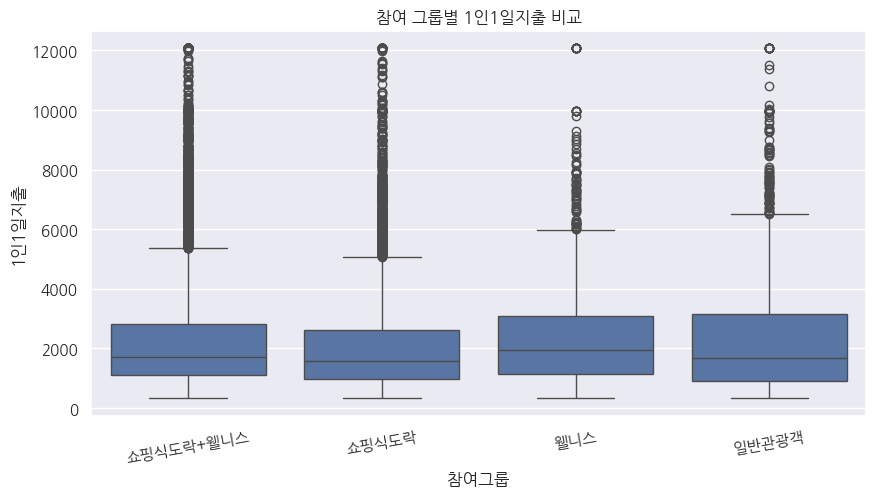

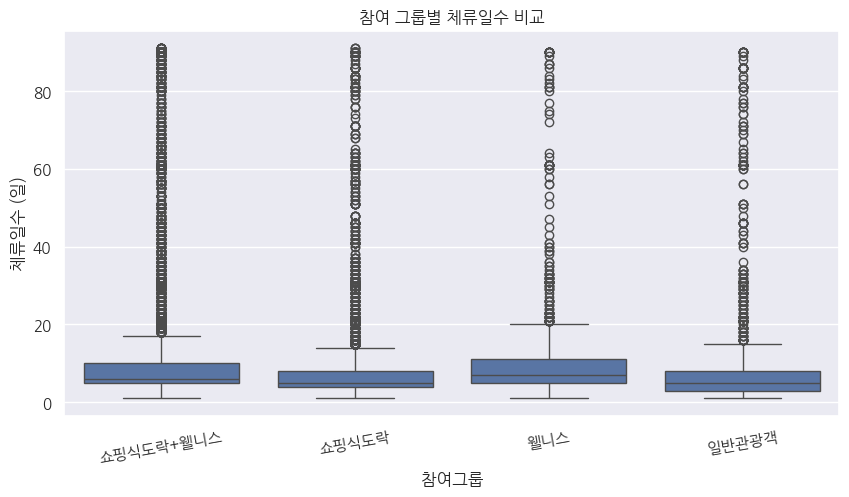

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['쇼핑식도락+웰니스', '쇼핑식도락', '웰니스', '일반관광객']

# 1인1일지출 박스플롯
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='참여그룹', y='1인지출경비', order=order)
plt.title('참여 그룹별 1인1일지출 비교')
plt.ylabel('1인1일지출')
plt.xticks(rotation=10)
plt.show()

# 체류일수 박스플롯
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='참여그룹', y='총체재기간', order=order)
plt.title('참여 그룹별 체류일수 비교')
plt.ylabel('체류일수 (일)')
plt.xticks(rotation=10)
plt.show()

In [ ]:
# 그룹별 기술통계 요약
group_stats = data.groupby('참여그룹')[['1인지출경비', '총체재기간']].describe().loc[order]
print(group_stats)

            1인지출경비                                                        \
             count         mean          std     min       25%       50%   
참여그룹                                                                       
쇼핑식도락+웰니스  19830.0  2251.215534  1781.403564  325.58  1092.000  1721.920   
쇼핑식도락       9322.0  2122.719014  1808.330135  325.58   960.000  1567.875   
웰니스         1286.0  2462.264914  2000.938003  325.58  1125.810  1950.000   
일반관광객       1974.0  2372.766925  2088.073599  325.58   911.895  1676.425   

                                 총체재기간                                       \
                 75%      max    count       mean        std  min  25%  50%   
참여그룹                                                                          
쇼핑식도락+웰니스  2804.2375  12072.5  19830.0  10.725719  14.107834  1.0  5.0  6.0   
쇼핑식도락      2607.6675  12072.5   9322.0   8.526389  11.922343  1.0  4.0  5.0   
웰니스        3072.7000  12072.5   1286.0  11.148523  14.238017  1.0  5.0  

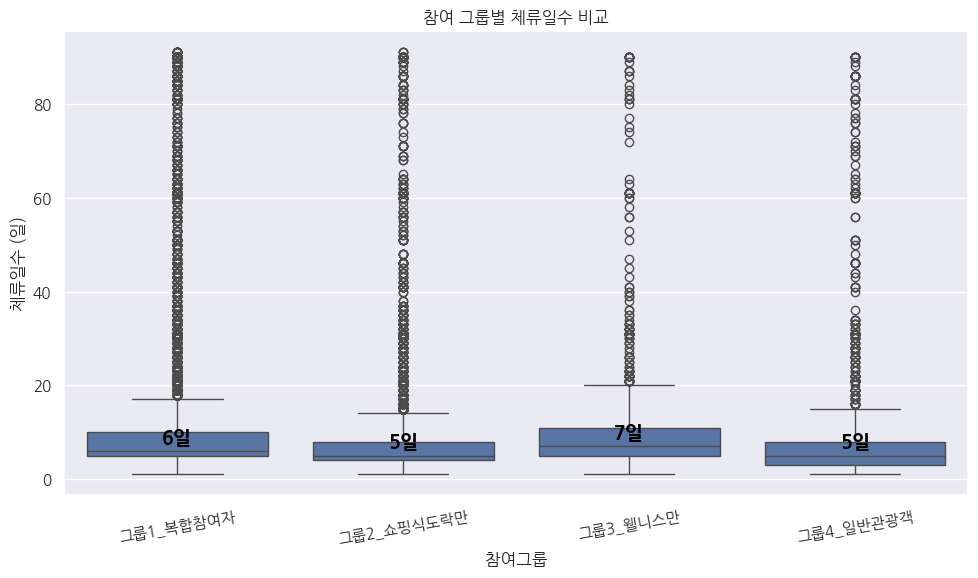

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='참여그룹', y='총체재기간', order=order)
medians = data.groupby('참여그룹')['총체재기간'].median().loc[order]
for i, median in enumerate(medians):
    ax.text(i, median + 0.7, f'{int(round(median))}일', ha='center', va='bottom', fontweight='bold', color='black')
plt.title('참여 그룹별 체류일수 비교')
plt.ylabel('체류일수 (일)')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

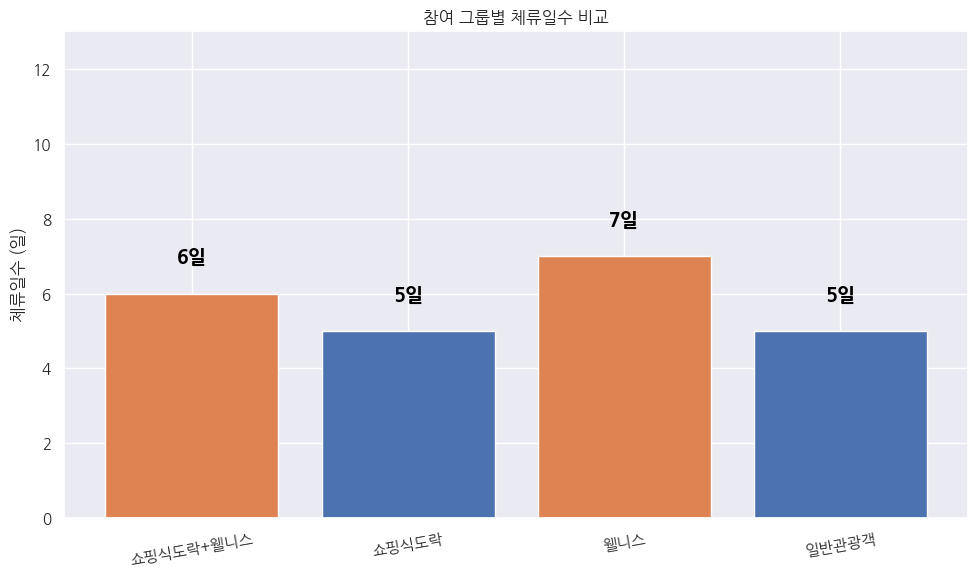

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 그룹별 중앙값 계산 (order 순서로 정렬)
medians = data.groupby('참여그룹')['총체재기간'].median().loc[order]

# 색상 매핑: 그룹별로 색 지정
color_map = {
    '쇼핑식도락+웰니스': '#dd8452',  # 파랑 계열
    '웰니스': '#dd8452',     # 파랑 계열
    '쇼핑식도락': '#4c72b0',  # 주황 계열
    '일반관광객': '#4c72b0'     # 주황 계열
}

colors = [color_map[group] for group in medians.index]

# 막대그래프 그리기
bars = plt.bar(medians.index, medians.values, color=colors)

# y축 범위 여유 있게 설정 (최대 중앙값 + 4일 정도 여유)
max_median = medians.max()
plt.ylim(0, max_median + 6)

# 중앙값 텍스트 추가 (소수점 없이 일 단위)
for i, median in enumerate(medians):
    plt.text(i, median + 0.7, f'{int(round(median))}일', ha='center', va='bottom', fontweight='bold', color='black')

plt.title('참여 그룹별 체류일수 비교')
plt.ylabel('체류일수 (일)')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


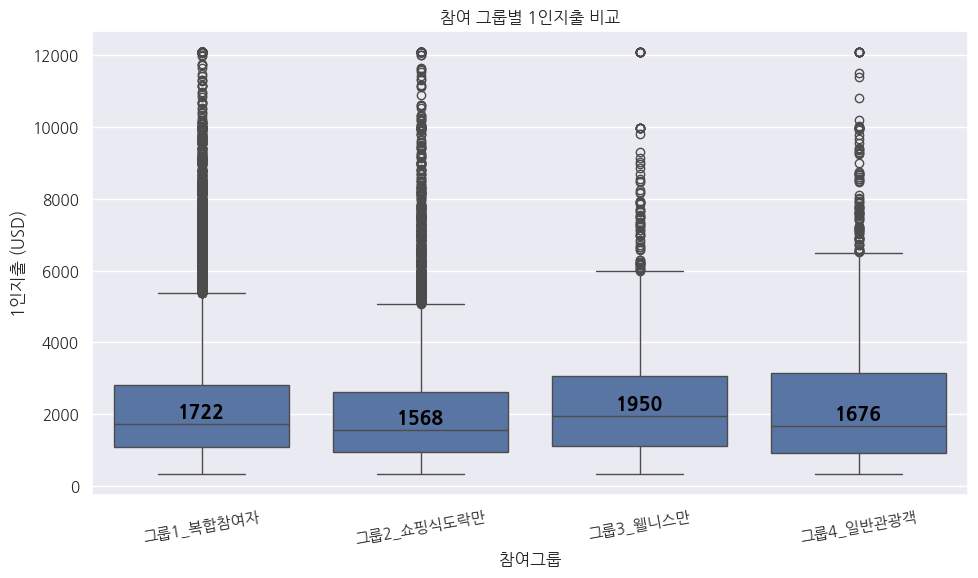

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='참여그룹', y='1인지출경비', order=order)
medians = data.groupby('참여그룹')['1인지출경비'].median().loc[order]
for i, median in enumerate(medians):
    ax.text(i, median + 50, f'{median:.0f}', ha='center', va='bottom', fontweight='bold', color='black')
plt.title('참여 그룹별 1인지출 비교')
plt.ylabel('1인지출 (USD)')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

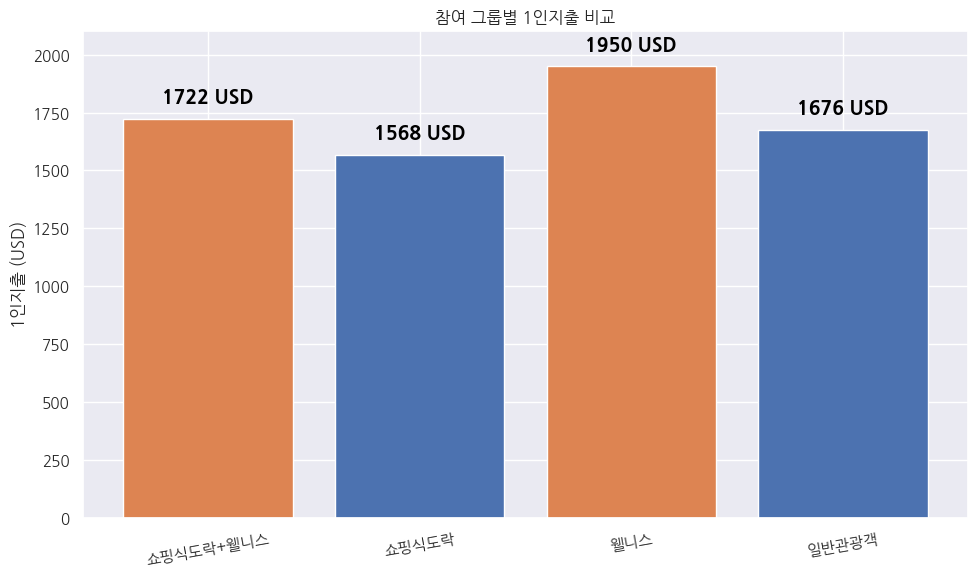

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 그룹별 중앙값 계산 (order 순서로 정렬)
medians = data.groupby('참여그룹')['1인지출경비'].median().loc[order]

# 색상 매핑: 그룹별로 색 지정
color_map = {
 '쇼핑식도락+웰니스': '#dd8452',  # 파랑 계열
    '웰니스': '#dd8452',     # 파랑 계열
    '쇼핑식도락': '#4c72b0',  # 주황 계열
    '일반관광객': '#4c72b0'     # 주황 계열
}

colors = [color_map[group] for group in medians.index]

# 막대그래프 그리기
bars = plt.bar(medians.index, medians.values, color=colors)

# y축 범위 여유 있게 설정 (최대 중앙값 + 150 정도 여유)
max_median = medians.max()
plt.ylim(0, max_median + 150)

plt.title('참여 그룹별 1인지출 비교')
plt.ylabel('1인지출 (USD)')
plt.xticks(rotation=10)

# 중앙값 텍스트 추가 (USD 표시 포함)
for i, median in enumerate(medians):
    plt.text(i, median + 50, f'{median:.0f} USD', ha='center', va='bottom', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


- 그룹1이 그룹2보다 지출이 큼 -> 웰니스 참여가 추가적인 소비를 유발했을 가능성이 있음
- 더하여 웰니스+쇼핑/식도락 조합이 소비 증대에 효과를 미쳤나?
- 그룹3vs그룹4 -> 웰니스 단일 참여만으로도 일반 관광객보다 평균적으로 비교적 더 높은 체류나 소비를 유도한 것으로 보임
